In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the data
data = pd.read_csv('test_scores.csv')

# Display the first 5 rows of the dataframe
data.head()



,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [2]:
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached narwhals-1.40.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 2.5 MB/s eta 0:00:41
    --------------------------------------- 2.4/102.5 MB 4.1 MB/s eta 0:00:25
   - -------------------------------------- 3.4/102.5 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 3.7/102.5 MB 4.5 MB/s eta 0:00:22
   -- ------------------------------------- 5.2/102.5 MB 4.4 MB/s eta 0:00:22
   -- ------------------------------------- 6.0/102.5 MB 4.6 MB/s eta 0:00:21
   -- ------------------------------------- 7.1/102.5 MB 4.4 MB/s eta 0:00:22
   --- --------------------------

In [2]:
# 检查数据的基本信息
print("\n数据集信息：")
print(data.info())


数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB
None


In [3]:
data.isnull().sum() #checking for total null values

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [4]:
# Get statistical summary of the dataframe
data.describe()

,n_student,pretest,posttest
count,1984.000000,1984.000000,1984.00000
mean,22.769153,54.980847,67.12500
std,4.248477,13.558027,13.93532
min,14.000000,22.000000,32.00000
25%,20.000000,44.000000,56.00000
50%,22.000000,56.000000,68.00000
75%,27.000000,65.000000,77.00000
max,31.000000,93.000000,100.00000


In [5]:
# 数据基本描述
print("\n数据基本统计信息：")
print(data.describe(include='all'))



数据基本统计信息：
       school school_setting school_type classroom teaching_method  \
count    1984           1984        1984      1984            1984   
unique     23              3           2        97               2   
top     GOOBU          Urban      Public       18K        Standard   
freq      147            841        1463        29            1274   
mean      NaN            NaN         NaN       NaN             NaN   
std       NaN            NaN         NaN       NaN             NaN   
min       NaN            NaN         NaN       NaN             NaN   
25%       NaN            NaN         NaN       NaN             NaN   
50%       NaN            NaN         NaN       NaN             NaN   
75%       NaN            NaN         NaN       NaN             NaN   
max       NaN            NaN         NaN       NaN             NaN   

          n_student student_id gender             lunch      pretest  \
count   1984.000000       1984   1984              1984  1984.000000   
uniq

In [6]:
print(data.columns.tolist())

['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'n_student', 'student_id', 'gender', 'lunch', 'pretest', 'posttest']


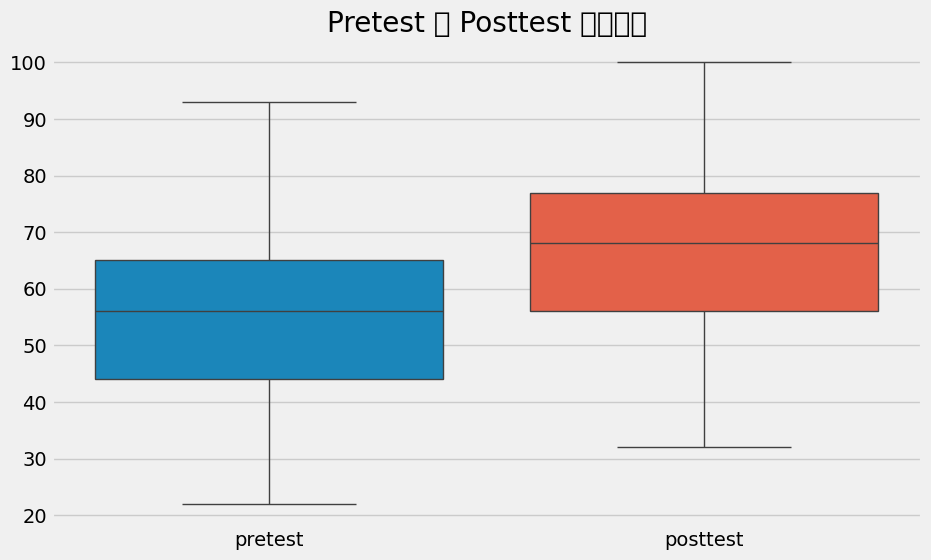

In [7]:
# 可视化数据分布（箱线图）
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pretest', 'posttest']])
plt.title("Pretest 和 Posttest 成绩分布")
plt.show()

In [8]:
# 查看数据统计信息
print(data[['pretest', 'posttest']].describe())

           pretest    posttest
count  1984.000000  1984.00000
mean     54.980847    67.12500
std      13.558027    13.93532
min      22.000000    32.00000
25%      44.000000    56.00000
50%      56.000000    68.00000
75%      65.000000    77.00000
max      93.000000   100.00000


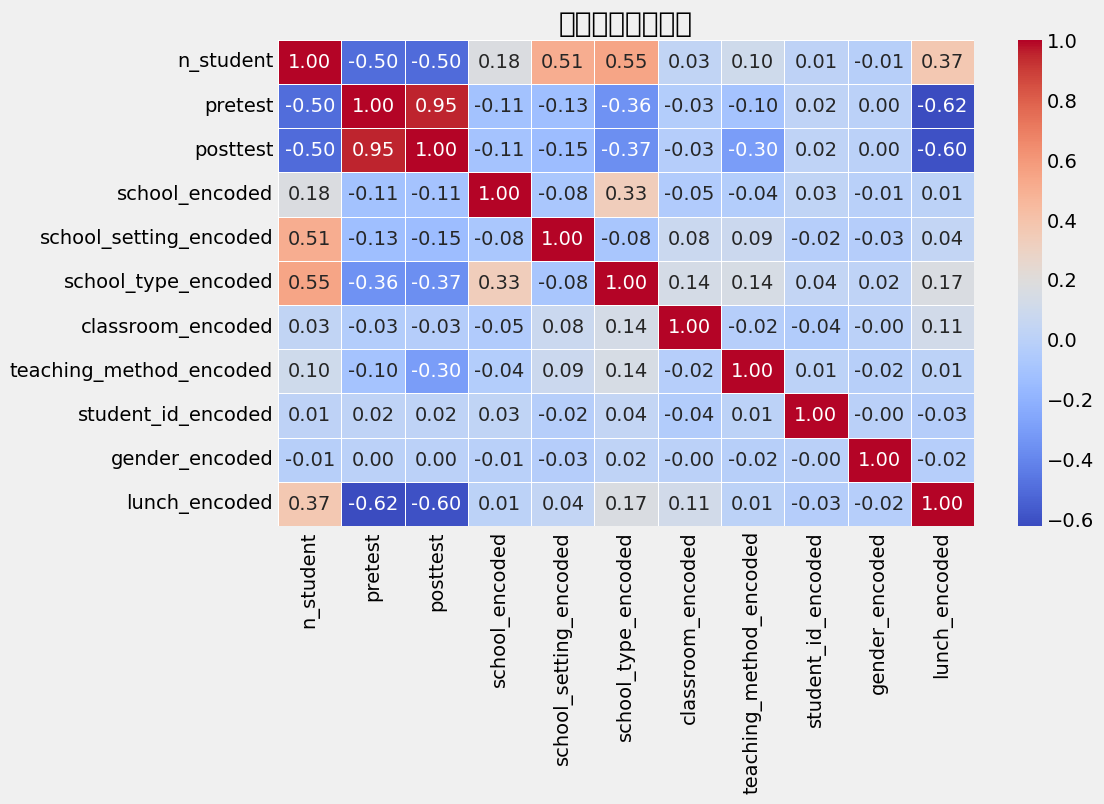

In [46]:
# 相关性分析（热力图）
plt.figure(figsize=(10, 6))

# 只选择数值列
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("变量相关性热力图")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# 对 school 列进行编码
label_encoder_seller = LabelEncoder()
data['school_encoded'] = label_encoder_seller.fit_transform(data['school'])

# 检查编码后的数据
print(data[['school', 'school_encoded']].head())

  school  school_encoded
0  ANKYI               0
1  ANKYI               0
2  ANKYI               0
3  ANKYI               0
4  ANKYI               0


In [11]:
from sklearn.preprocessing import LabelEncoder

# 对 school_setting 列进行编码
label_encoder_seller = LabelEncoder()
data['school_setting_encoded'] = label_encoder_seller.fit_transform(data['school_setting'])

# 检查编码后的数据
print(data[['school_setting', 'school_setting_encoded']].head())

  school_setting  school_setting_encoded
0          Urban                       2
1          Urban                       2
2          Urban                       2
3          Urban                       2
4          Urban                       2


In [12]:
from sklearn.preprocessing import LabelEncoder

# 对 school_type 列进行编码
label_encoder_seller = LabelEncoder()
data['school_type_encoded'] = label_encoder_seller.fit_transform(data['school_type'])

# 检查编码后的数据
print(data[['school_type', 'school_type_encoded']].head())

  school_type  school_type_encoded
0  Non-public                    0
1  Non-public                    0
2  Non-public                    0
3  Non-public                    0
4  Non-public                    0


In [13]:
from sklearn.preprocessing import LabelEncoder

# 对 classroom 列进行编码
label_encoder_seller = LabelEncoder()
data['classroom_encoded'] = label_encoder_seller.fit_transform(data['classroom'])

# 检查编码后的数据
print(data[['classroom', 'classroom_encoded']].head())

  classroom  classroom_encoded
0       6OL                 22
1       6OL                 22
2       6OL                 22
3       6OL                 22
4       6OL                 22


In [14]:
from sklearn.preprocessing import LabelEncoder

# 对 teaching_method 列进行编码
label_encoder_seller = LabelEncoder()
data['teaching_method_encoded'] = label_encoder_seller.fit_transform(data['teaching_method'])

# 检查编码后的数据
print(data[['teaching_method', 'teaching_method_encoded']].head())

  teaching_method  teaching_method_encoded
0        Standard                        1
1        Standard                        1
2        Standard                        1
3        Standard                        1
4        Standard                        1


In [15]:
from sklearn.preprocessing import LabelEncoder

# 对 student_id 列进行编码
label_encoder_seller = LabelEncoder()
data['student_id_encoded'] = label_encoder_seller.fit_transform(data['student_id'])

# 检查编码后的数据
print(data[['student_id', 'student_id_encoded']].head())

  student_id  student_id_encoded
0      2FHT3                 144
1      3JIVH                 198
2      3XOWE                 217
3      556O0                 285
4      74LOE                 395


In [16]:
from sklearn.preprocessing import LabelEncoder

# 对 gender 列进行编码
label_encoder_seller = LabelEncoder()
data['gender_encoded'] = label_encoder_seller.fit_transform(data['gender'])

# 检查编码后的数据
print(data[['gender', 'gender_encoded']].head())

   gender  gender_encoded
0  Female               0
1  Female               0
2    Male               1
3  Female               0
4    Male               1


In [17]:
from sklearn.preprocessing import LabelEncoder

# 对 lunch 列进行编码
label_encoder_seller = LabelEncoder()
data['lunch_encoded'] = label_encoder_seller.fit_transform(data['lunch'])

# 检查编码后的数据
print(data[['lunch', 'lunch_encoded']].head())

              lunch  lunch_encoded
0  Does not qualify              0
1  Does not qualify              0
2  Does not qualify              0
3  Does not qualify              0
4  Does not qualify              0


In [18]:
data.to_csv('encoded_data.csv',index=False)

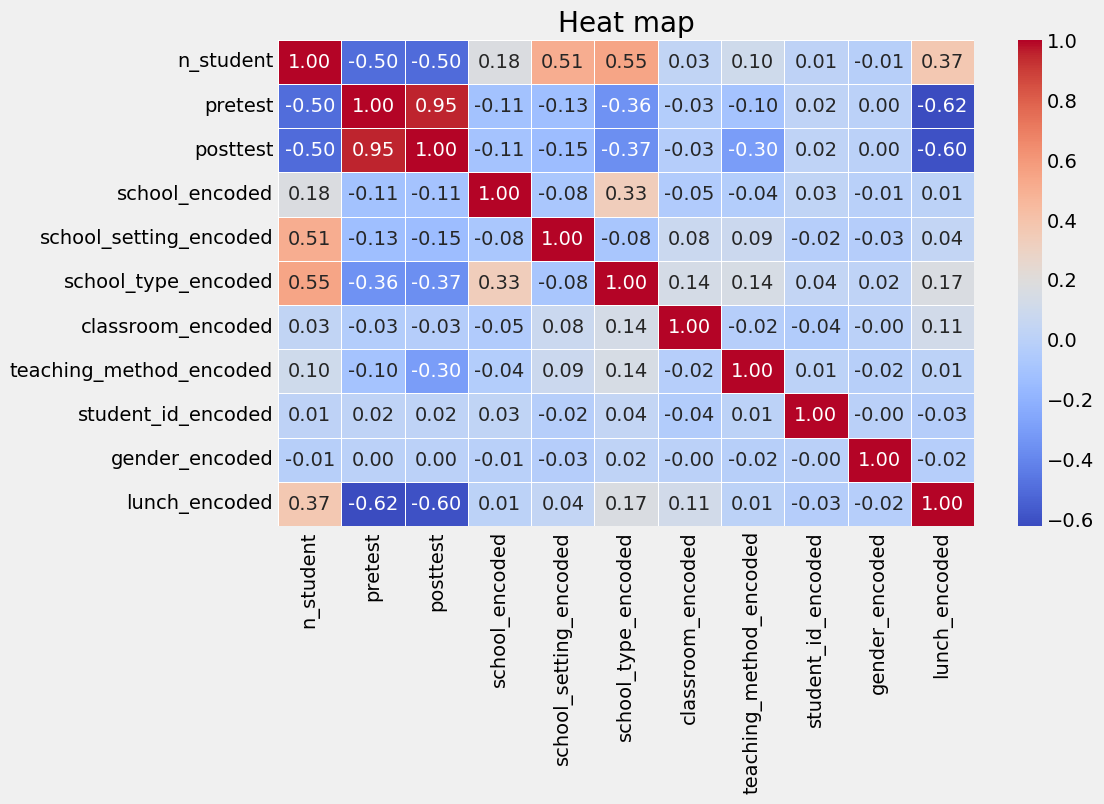

In [19]:
# 相关性分析（热力图）
plt.figure(figsize=(10, 6))

# 只选择数值列
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heat map")
plt.show()

In [20]:
# 计算相关性矩阵
correlation_matrix = data.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                         n_student   pretest  posttest  school_encoded  \
n_student                 1.000000 -0.498769 -0.504600        0.175552   
pretest                  -0.498769  1.000000  0.950223       -0.113107   
posttest                 -0.504600  0.950223  1.000000       -0.107609   
school_encoded            0.175552 -0.113107 -0.107609        1.000000   
school_setting_encoded    0.511191 -0.128466 -0.146266       -0.081792   
school_type_encoded       0.549248 -0.355418 -0.367656        0.330368   
classroom_encoded         0.031869 -0.034590 -0.026858       -0.049648   
teaching_method_encoded   0.103500 -0.103759 -0.304392       -0.038016   
student_id_encoded        0.013269  0.021303  0.018553        0.026006   
gender_encoded           -0.014389  0.003821  0.003519       -0.012534   
lunch_encoded             0.371752 -0.622419 -0.597991        0.006839   

                         school_setting_encoded  school_type_encoded  \
n_student                              

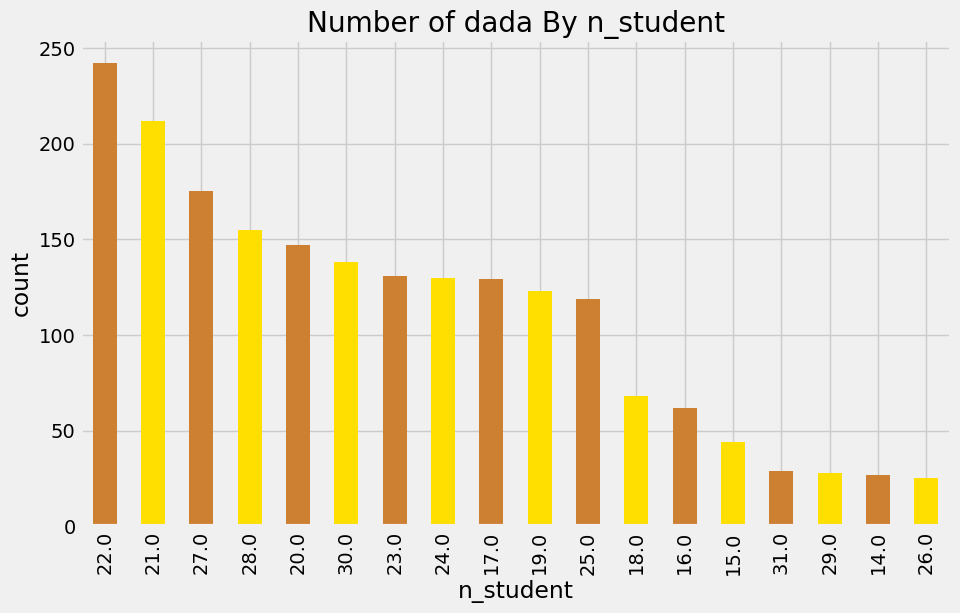

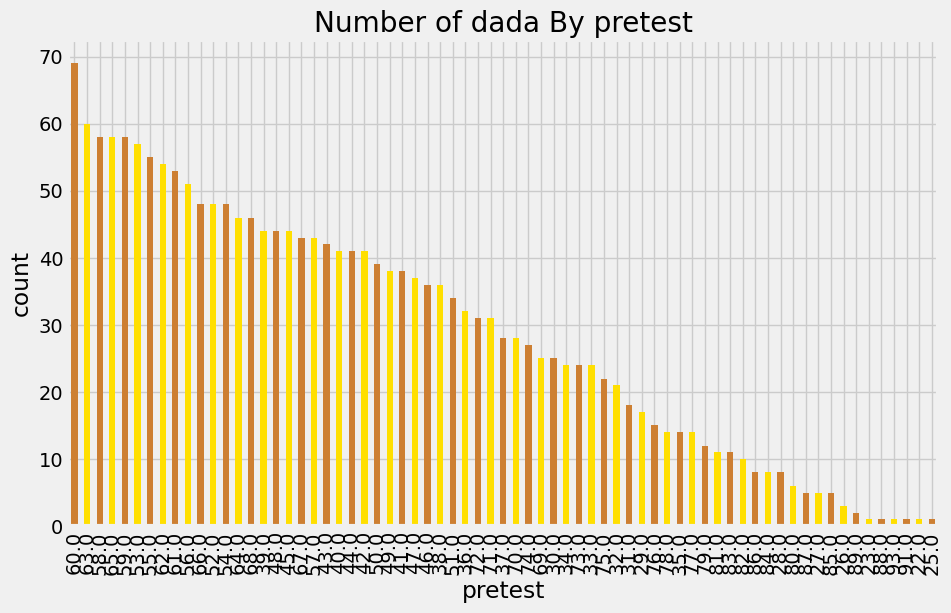

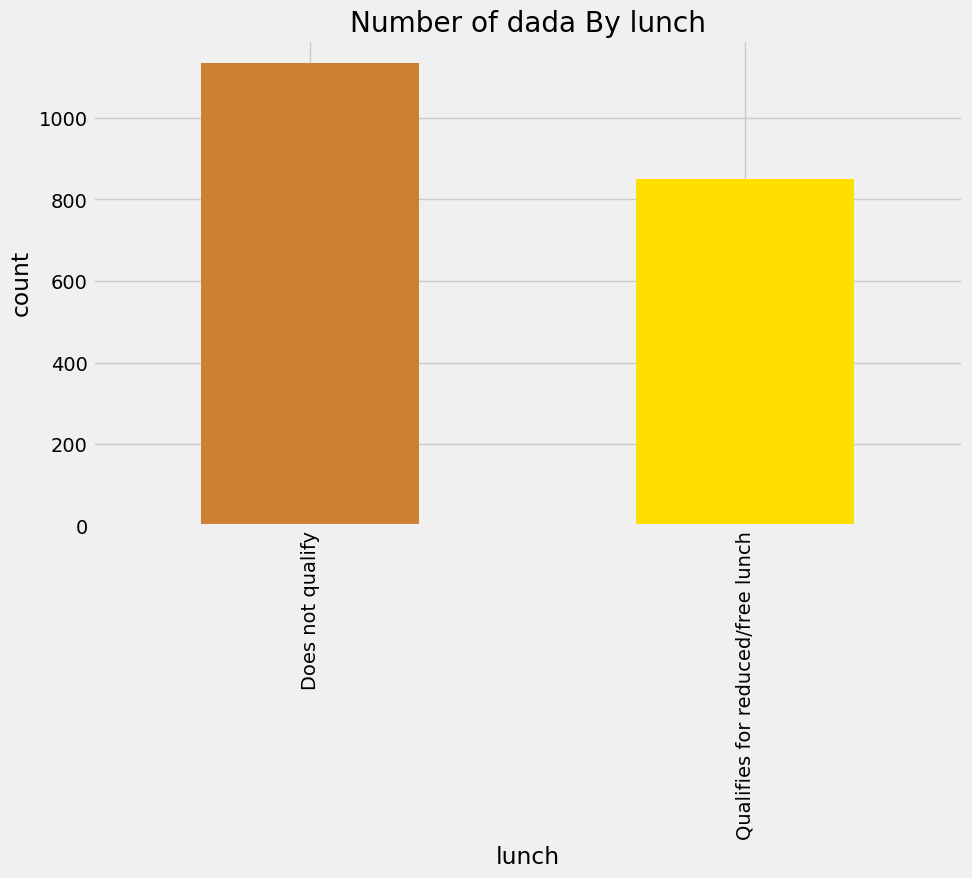

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(10, 6))

# 只显示Fuel_Type列的分布
data['n_student'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00'])
plt.title('Number of dada By n_student')
plt.ylabel('count')

# 显示图表
plt.show()


# 设置图表大小
plt.figure(figsize=(10, 6))

# 只显示Fuel_Type列的分布
data['pretest'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00'])
plt.title('Number of dada By pretest')
plt.ylabel('count')

# 显示图表
plt.show()

# 设置图表大小
plt.figure(figsize=(10, 6))

# 只显示Fuel_Type列的分布
data['lunch'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00'])
plt.title('Number of dada By lunch')
plt.ylabel('count')

# 显示图表
plt.show()


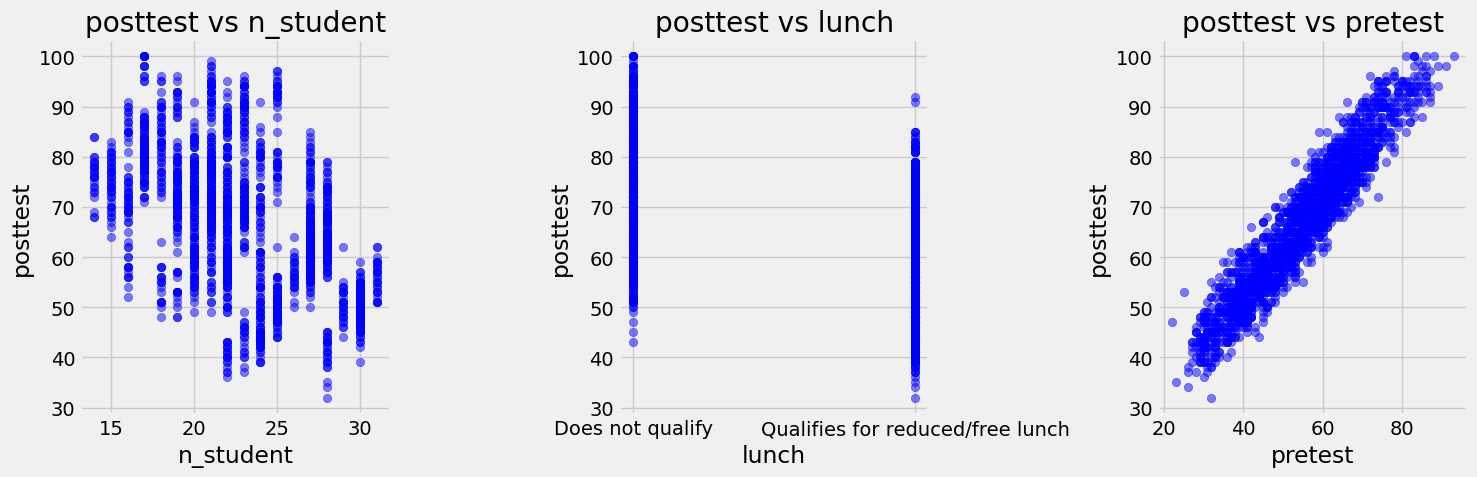

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择相关性绝对值大于0.5的特征
selected_features = ['n_student', 'lunch', 'pretest']

# 创建1x3的子图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制散点图
for i, feature in enumerate(selected_features):
    ax = axes[i]  # 直接使用axes[i]来指定位置
    ax.scatter(data[feature], data['posttest'], color='b', alpha=0.5)
    ax.set_title(f'posttest vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('posttest')

plt.tight_layout()  # 调整布局，避免图像重叠
plt.show()


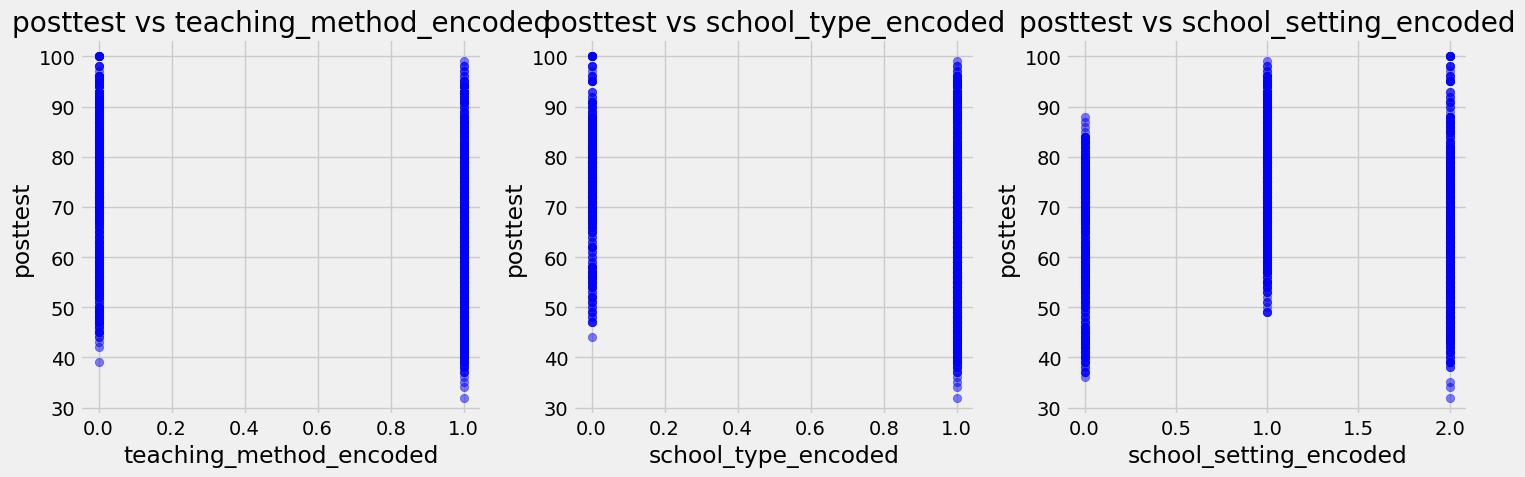

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择相关性绝对值大于0.5的特征
selected_features = ['teaching_method_encoded', 'school_type_encoded', 'school_setting_encoded']

# 创建1x3的子图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制散点图
for i, feature in enumerate(selected_features):
    ax = axes[i]  # 直接使用axes[i]来指定位置
    ax.scatter(data[feature], data['posttest'], color='b', alpha=0.5)
    ax.set_title(f'posttest vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('posttest')

plt.tight_layout()  # 调整布局，避免图像重叠
plt.show()


In [24]:
# 进行 One-Hot 编码
data_encoded = pd.get_dummies(data, columns=['school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch'], drop_first=True)

# 定义特征和目标变量
X = data_encoded.drop(columns=['posttest', 'school', 'student_id'], errors='ignore')
y = data_encoded['posttest']

print (X)
print (y)



      n_student  pretest  school_encoded  school_setting_encoded  \
0          20.0     62.0               0                       2   
1          20.0     66.0               0                       2   
2          20.0     64.0               0                       2   
3          20.0     61.0               0                       2   
4          20.0     64.0               0                       2   
...         ...      ...             ...                     ...   
1979       30.0     39.0              22                       2   
1980       30.0     39.0              22                       2   
1981       30.0     38.0              22                       2   
1982       30.0     46.0              22                       2   
1983       30.0     41.0              22                       2   

      school_type_encoded  classroom_encoded  teaching_method_encoded  \
0                       0                 22                        1   
1                       0            

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取原始数据
data = pd.read_csv('preprocessed_data.csv')

# 定义自变量X 和 因变量y
X = data[['n_student', 'pretest', 'lunch_encoded']]
y = data['posttest']

# 保存完整X和y到csv
X.to_csv('X_full.csv', index=False)
y.to_csv('y_full.csv', index=False)

# 划分训练集和测试集，60%训练，40%测试
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 保存划分好的数据到csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✅ 数据集划分完成并保存成功！")




✅ 数据集划分完成并保存成功！


In [27]:
# 训练线性回归模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 输出模型的系数和截距
print(f"模型的系数：{model.coef_}")
print(f"模型的截距：{model.intercept_}")


模型的系数：[-6.44809103e-01  4.06319898e-01  5.22346143e-02  3.03706824e+00
 -2.54524544e+00 -6.98099572e-02 -2.43268504e+00 -7.43889160e-05
 -1.83714995e-01 -1.18783845e+00  4.49460754e+00 -7.28769652e-01
 -2.54524544e+00  8.79806194e+00 -6.11883761e+00 -2.66313540e+00
 -4.95658280e+00  9.31481853e-01 -5.45591720e+00  2.40018682e-01
 -1.16974295e+01 -1.40159665e+01 -5.57878530e+00 -6.98408745e+00
 -3.26092618e+00 -9.24456125e+00 -1.05390744e+01 -8.26707064e+00
 -2.01874698e+00 -8.23357468e+00  1.86629496e+00  4.11677307e+00
 -1.83228940e+00 -1.05179716e+01 -3.76669250e+00 -3.14900446e+00
 -6.54797369e+00  3.46116447e+00  1.24416169e+01 -7.00146647e+00
 -9.07683087e+00 -6.04686417e+00  5.08259368e+00 -1.93156773e+00
 -2.58226375e-01 -1.94170707e+00 -1.20568367e+01  8.27881082e+00
  4.51070725e+00 -1.04170269e+00  3.44155896e+00 -2.34311578e+00
  4.83492587e+00 -2.28947021e-01 -3.44573269e+00 -3.58091956e+00
 -5.01585144e+00 -1.03927348e+01 -1.95663475e+00 -2.62958348e+00
  6.53968310e+00 -6

In [28]:
# 进行预测 (pretest)
y_pred = model.predict(X_test)

# 计算 R² 分数 (R² 分数是回归模型评估的一个常用指标，表示模型对数据变异的解释能力)
from sklearn.metrics import r2_score
print(f"R² 分数: {r2_score(y_test, y_pred):.4f}")


R² 分数: 0.9537


In [29]:
# 输出前 10 个预测值与真实值对比
comparison = pd.DataFrame({'实际值': y_test, '预测值': y_pred})
print(comparison.head(10))


       实际值        预测值
582   72.0  70.881287
1851  70.0  75.133019
1052  82.0  79.433259
1075  72.0  74.855596
917   55.0  57.062108
70    78.0  79.396007
429   79.0  78.613127
903   49.0  51.517658
914   58.0  57.438762
1664  61.0  57.573655


In [30]:
# 解释
# R² 分数的含义：
# R² = 0.9572 意味着模型能很好地拟合数据，预测结果接近真实值。
# R² 的值越接近 1，说明模型的预测效果越好，越能够解释数据的变异性。
# 总结
# 模型的截距： 65.94，表示当所有特征的值为 0 时，预测的目标变量值是 65.94。
# R² 分数： 0.9572，表示模型的预测效果很强，能够解释约 95.72% 的数据变化。
# 模型在大多数情况下能较好地预测实际值，且误差在合理范围内

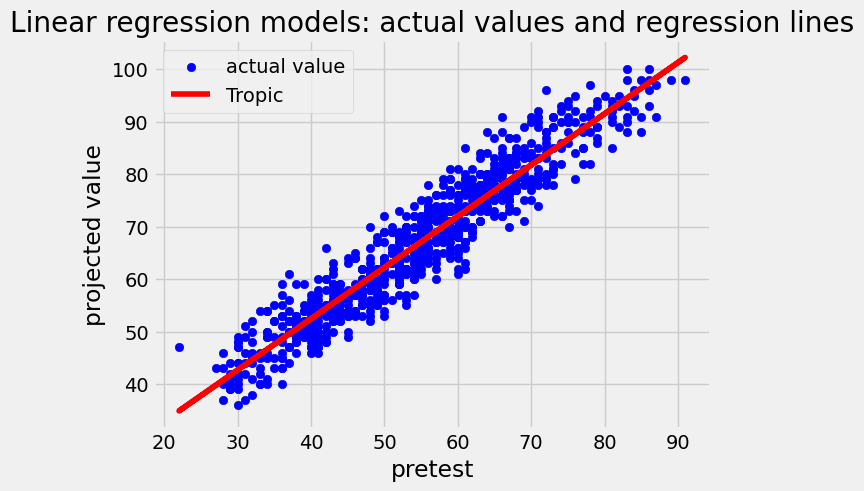

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['pretest']], y_train)  # 用一个特征进行拟合 (pretest)
# 预测值
y_pred = model.predict(X_test[['pretest']])

# 绘制散点图
plt.scatter(X_test[['pretest']], y_test, color='blue', label='actual value')

# 绘制回归线
plt.plot(X_test[['pretest']], y_pred, color='red', label='Tropic')

# 添加标题和标签
plt.title('Linear regression models: actual values and regression lines')
plt.xlabel('pretest')
plt.ylabel('projected value')
plt.legend()

# 显示图形
plt.show()


In [32]:
#数据的相关性：从你的数据描述中，pretest 和 posttest 存在强正相关性（R² = 0.9572），这意味着回归线应该很好地拟合数据，图中的趋势是正确的。
#预测值的分布：从图上看，预测值大致沿着一条上升的直线，这与线性回归的模型输出一致，符合数据的线性关系。

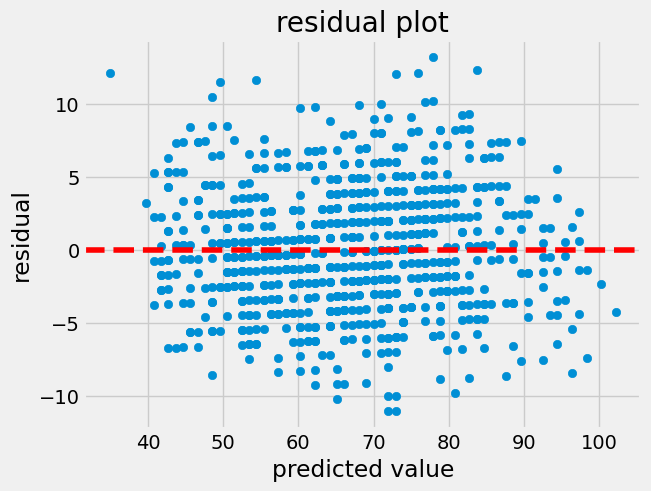

In [33]:
# 计算残差 (pretest)
residuals = y_test - y_pred

# 绘制残差图
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # y=0 的基准线
plt.title('residual plot')
plt.xlabel('predicted value')
plt.ylabel('residual')

plt.show()


In [34]:
#在良好的回归模型中，残差应该随机分布在零线周围，且没有明显的模式。从图来看，残差分布大致是均匀的，围绕零线波动，且没有出现明显的趋势。这表明你的模型拟合得不错，残差没有系统性的模式。


In [35]:
# 计算误差和模型表现指标 R² (n_student)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel evaluation results：")
print(f"mean square error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"R² 分数 (R-squared): {r2:.4f}")


Model evaluation results：
mean square error (MSE): 18.67
Mean absolute error (MAE): 3.49
R² 分数 (R-squared): 0.9025


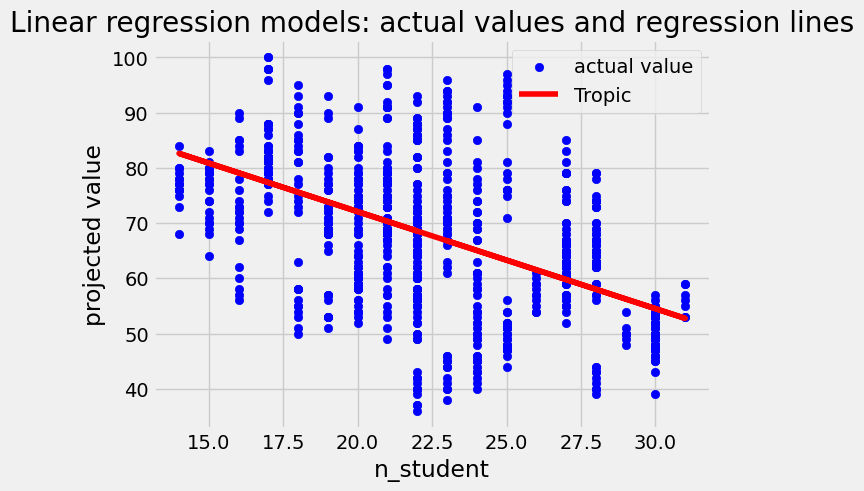

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['n_student']], y_train)  # 用一个特征进行拟合
# 预测值
y_pred = model.predict(X_test[['n_student']])

# 绘制散点图
plt.scatter(X_test[['n_student']], y_test, color='blue', label='actual value')

# 绘制回归线
plt.plot(X_test[['n_student']], y_pred, color='red', label='Tropic')

# 添加标题和标签
plt.title('Linear regression models: actual values and regression lines')
plt.xlabel('n_student')
plt.ylabel('projected value')
plt.legend()

# 显示图形
plt.show()


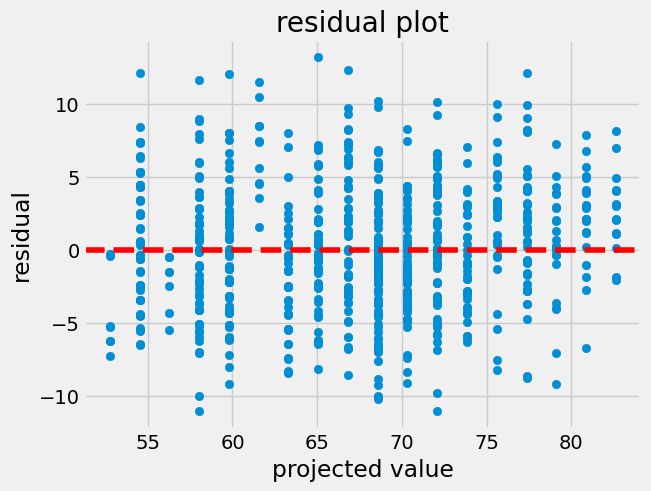

In [37]:
# 计算残差，不知为何没有显示 (n_student)
# #residuals = y_test - y_pred(这是什么我为啥注释掉了？)

# 绘制残差图
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # y=0 的基准线
plt.title('residual plot')
plt.xlabel('projected value')
plt.ylabel('residual')

plt.show()

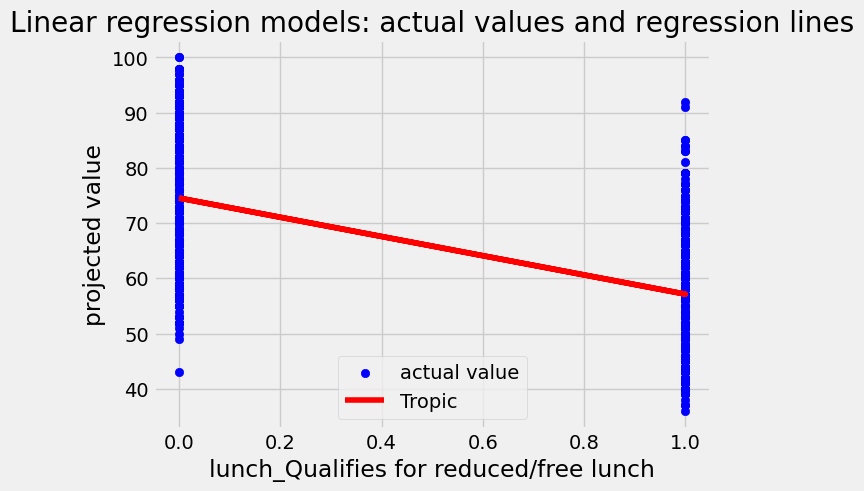

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['lunch_Qualifies for reduced/free lunch']], y_train)  # 用一个特征进行拟合 (lunch)
# 预测值
y_pred = model.predict(X_test[['lunch_Qualifies for reduced/free lunch']])

# 绘制散点图
plt.scatter(X_test[['lunch_Qualifies for reduced/free lunch']], y_test, color='blue', label='actual value')

# 绘制回归线
plt.plot(X_test[['lunch_Qualifies for reduced/free lunch']], y_pred, color='red', label='Tropic')

# 添加标题和标签
plt.title('Linear regression models: actual values and regression lines')
plt.xlabel('lunch_Qualifies for reduced/free lunch')
plt.ylabel('projected value')
plt.legend()

# 显示图形
plt.show()


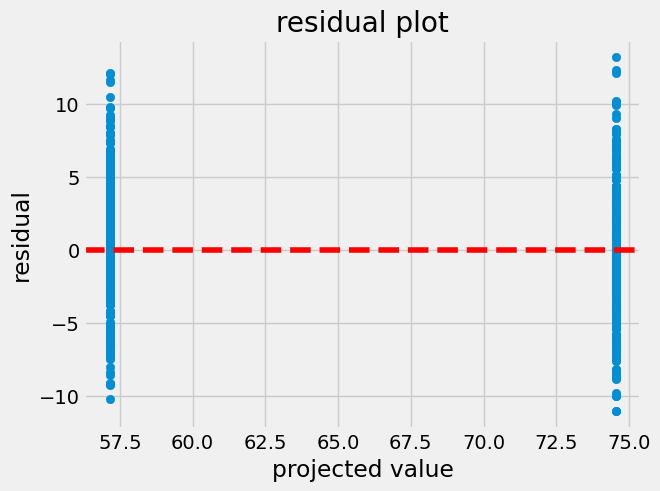

In [39]:
# 计算残差 (lunch)

# 绘制残差图
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # y=0 的基准线
plt.title('residual plot')
plt.xlabel('projected value')
plt.ylabel('residual')

plt.show()

                                  Feature  Coefficient
1                                 pretest     0.940586
0                               n_student    -0.136149
2  lunch_Qualifies for reduced/free lunch    -0.587895


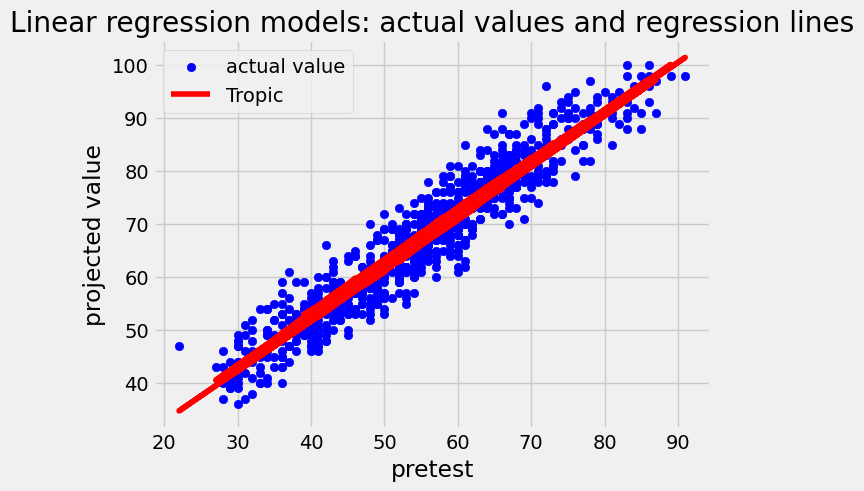

In [40]:
# 选择特定的特征进行训练
X_train_selected = X_train[['n_student', 'pretest', 'lunch_Qualifies for reduced/free lunch']]  # 选择相关性较高的特征(最高的三个;pretest/n_student/lunch)
X_test_selected = X_test[['n_student', 'pretest', 'lunch_Qualifies for reduced/free lunch']]

# 训练模型
model = LinearRegression()
model.fit(X_train_selected, y_train)

# 计算回归系数
feature_importance = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# 打印回归系数
print(feature_importance)

# 进行预测
y_pred = model.predict(X_test_selected)

# 绘制散点图和回归线等
plt.scatter(X_test_selected['pretest'], y_test, color='blue', label='actual value')
plt.plot(X_test_selected['pretest'], y_pred, color='red', label='Tropic')
plt.title('Linear regression models: actual values and regression lines')
plt.xlabel('pretest')
plt.ylabel('projected value')
plt.legend()
plt.show()


In [41]:
# 计算 R² 值
r2 = r2_score(y_test, y_pred)

# 打印 R² 值
print(f'R² score: {r2:.4f}')

#回归系数表明 pretest 变量对 projected value 影响最大，而 n_student 和 lunch_Qualifies for reduced/free lunch 对预测值的影响较小甚至是负向的。

R² score: 0.9029


In [42]:
# 显示前 10 个最重要的特征
print("\n最重要的特征（按绝对影响力排序）：")
print(feature_importance.head(10))



最重要的特征（按绝对影响力排序）：
                                  Feature  Coefficient
1                                 pretest     0.940586
0                               n_student    -0.136149
2  lunch_Qualifies for reduced/free lunch    -0.587895


In [43]:
#回归系数合理性：结果是合理的，pretest 有最高的回归系数，这与热力图中的高相关性（0.95）是一致的。n_student 和 lunch_Qualifies for reduced/free lunch 的回归系数相对较小，负值也符合数据中的相关性分析。

#模型的输出：回归系数的符号（正负）表明了特征与目标变量之间的关系：

#pretest 对 posttest 有正向影响。
#n_student 和 lunch_Qualifies for reduced/free lunch 对 posttest 有负向影响。

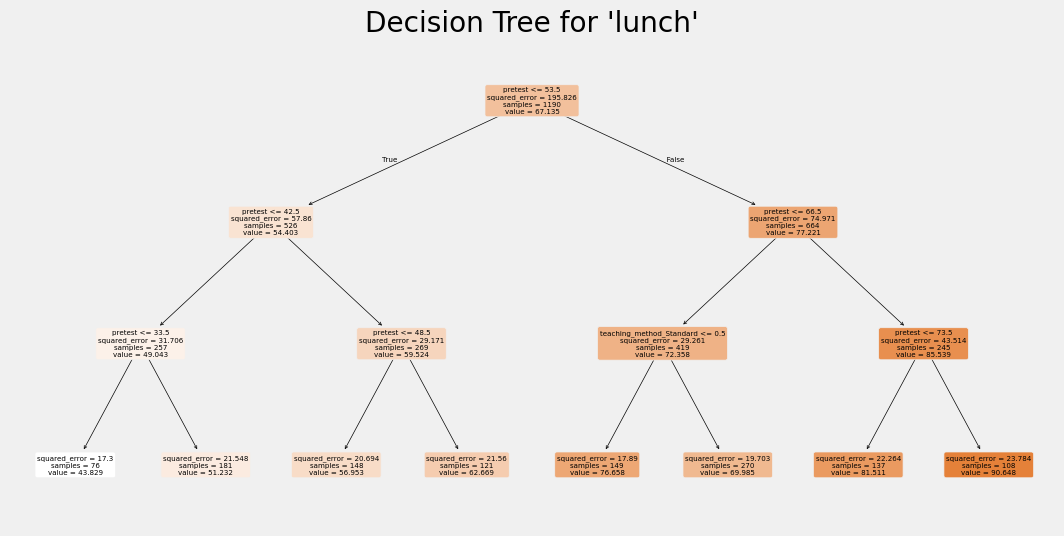

In [44]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# 训练决策树模型 (lunch)
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 预测
y_pred = tree_model.predict(X_test)

# 绘制决策树
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for 'lunch'")
plt.show()

In [45]:
# 评估模型
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 3.78
R² Score: 0.88
